**Carga las tres librerías de siempre**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Carga los datos adjuntos a este ejercicio en un dataframe**

In [2]:
data_df = pd.read_table("data_1.txt")

**Crea la matrix de features X y el vector de labels**

In [3]:
X = data_df.drop(columns=['label']).values
y = data_df['label'].values

**Calcula para KMeans y Agglomerative Clustering el índice `adjusted_rand_score`, `homogeneity_score`, `completeness_score` con el vector de labels de verdad**

In [4]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [5]:
from sklearn.metrics import adjusted_rand_score,\
homogeneity_score, completeness_score

In [6]:
km = KMeans(n_clusters=4, random_state=0)

print(adjusted_rand_score(labels_true=y, labels_pred=km.fit_predict(X)))
print(homogeneity_score(labels_true=y, labels_pred=km.fit_predict(X)))
print(completeness_score(labels_true=y, labels_pred=km.fit_predict(X)))

/Users/joelsebastiantorrescarrasco/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joelsebastiantorrescarrasco/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joelsebastiantorrescarrasco/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.4786408047070294
0.919973255212319
0.45999193668747806


In [7]:
agg = AgglomerativeClustering(n_clusters=4)

print(adjusted_rand_score(labels_true=y, labels_pred=agg.fit_predict(X)))
print(homogeneity_score(labels_true=y, labels_pred=agg.fit_predict(X)))
print(completeness_score(labels_true=y, labels_pred=agg.fit_predict(X)))

0.4825726070351759
0.9327784552416917
0.46638922762084617


**Puede que los datos tengan una estructura más rica. Mediante el método elbow (Acuérdate de que el atributo *inertia_* nos daba la información que necesitamos saber y plotear una vez fitteado el kmeans), estima el número óptimo de clusters. Haz lo mismo mediante el método silhouette**

In [8]:
from sklearn.metrics import silhouette_score

sil_scores = []
for clus in np.arange(2,10):
    km = KMeans(n_clusters=clus, random_state=0)
    
    sil_scores.append(silhouette_score(X, km.fit_predict(X)))

/Users/joelsebastiantorrescarrasco/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joelsebastiantorrescarrasco/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joelsebastiantorrescarrasco/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joelsebastiantorrescarrasco/anaconda3/lib/python3.11/site-packages/sklearn/

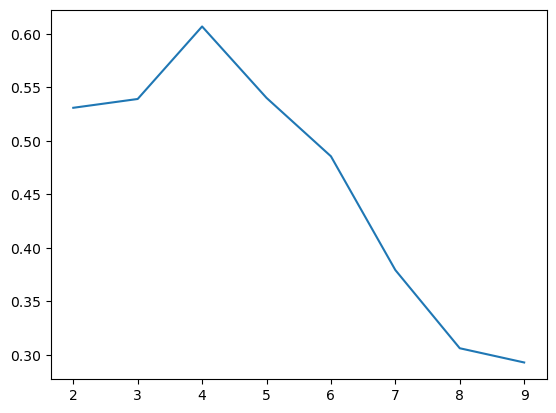

In [9]:
plt.plot(np.arange(2,10), sil_scores)

In [10]:
elbow_scores = []
for clus in np.arange(1,10):
    km = KMeans(n_clusters=clus, random_state=0)
    km.fit(X)
    elbow_scores.append(km.inertia_)

/Users/joelsebastiantorrescarrasco/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joelsebastiantorrescarrasco/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joelsebastiantorrescarrasco/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joelsebastiantorrescarrasco/anaconda3/lib/python3.11/site-packages/sklearn/

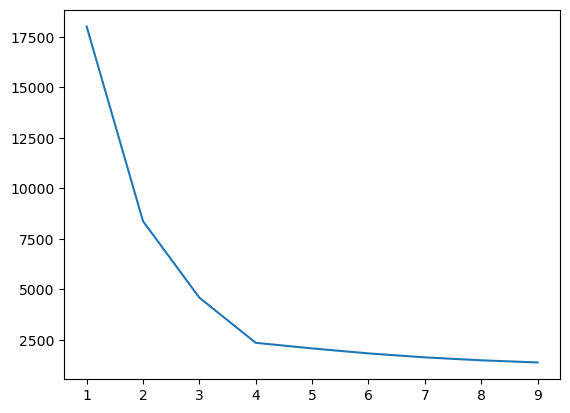

In [11]:
plt.plot(np.arange(1,10), elbow_scores)